
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Distribution of Income Tax
https://data.cso.ie/table/RVA02

Magnificent 7 Stock Prices Analysis - yfinance

House Prices Analysis Ireland
https://www.kaggle.com/datasets/raphaelmapp/ireland-house-prices-2010-to-2023
Get later version from property price register??




# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the well known 'magnificent 7' technology companies that dominate the S&P 500 stock exchange. These are the largest techoligical companies in the world & have historically made up a significant % weighting of the market capitalisation of the S&P 500. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Netflix Inc.   | NFLX   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corportaion   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assigment is to demonstrate tools learned in the module

In [1]:
# Libraries Imported

# Dates & Times. https://atlantictu-my.sharepoint.com/personal/ian_mcloughlin_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fian%5Fmcloughlin%5Fatu%5Fie%2FDocuments%2Fstudent%5Fshares%2Fcomputer%2Dinfrastructure%2F22%2Ddatetime%2Emkv&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2Eca70c99c%2D5d51%2D4c6a%2D8743%2D670d34da45a7
import datetime as dt

# Data frames
import pandas as pd

# Install yfinance if not already installed
#!pip install yfinance

# Yahoo finance data.
import yfinance as yf

# Plotting
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

import seaborn as sns



# Comments 1
i) We'll write a fucntion & download the stock info from yfinance - looking from the 1st Jan 2014 to the 30th Nov 2025 for the magnifcent 7
ii) download s&p 500  https://www.investing.com/academy/trading/what-is-the-sp-500/ & get %



thoughts

get weighting of mag7 in the s&p 500 MARKET CAP
look at % within their sectors maybe
ROLLING BALANCES  - BEST ONE ACROSS A QUARTER,YEAR - CALENDAR AND ROLLING YEAR MAYBE


In [ ]:
 # Set up the function 'get_data()' that can be called for closing prices of FAANG stocks over the last 10 years
def get_data():    
    df = yf.download("META AAPL AMZN NFLX GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',
        interval = '1d', group_by='ticker', auto_adjust=True, threads=True)
    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html



    
 # Call the function
df = get_data()

[*********************100%***********************]  7 of 7 completed


# Comments 2
In order to explore the data, we'll save the file to a csv folder, we will usa a placeholder for the file name.

In [ ]:
# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# Comment 3 - Cleaning

Use df.isnull to check for any null values.
Use df.head
Use df.tail
Use df.info


keep na rows is deafult in yfiance - can discuss this but do check anyway to show how we would clean if nas

In [28]:
# check for null values
df.isnull().sum()
# References:
# Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html


Ticker  Price 
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NFLX    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [29]:
# Display the first 5 rows of the dataframe
df.head()


Ticker           META                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2014-01-02  54.494062  54.881671  53.857980  54.374794  43195500  17.235795   
2014-01-03  54.682896  55.309037  54.195897  54.225716  38246200  17.148328   
2014-01-06  54.086575  56.909174  53.718843  56.849545  68852600  16.670347   
2014-01-07  57.346475  58.191266  56.869416  57.565125  77207400  16.883435   
2014-01-08  57.247089  58.052127  56.879357  57.873230  56682400  16.712529   

Ticker                                                  ...       GOOG  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2014-01-02  17.277669  17.122271  17.156700  234684800  ...  27.575547   
2014-01-03  17.174382  16.762780  16.779840  392467600  ...  27.564173   
2014-01-06  16.960359  16.550929  16.871340  412610800  ...  27.514978   
2014-01-07  16.934304  16.684924  16.750681  317209200  ...  27.811385   
2014-01-08  16.921898  16.708809  16.856762  258529600  ...  28.330531   

Ticker                                                      NFLX            \
Price            High        Low      Close     Volume      Open      High   
Date                                                                         
2014-01-02  27.632158  27.397553  27.517698   73129082  5.240143  5.251143   
2014-01-03  27.611884  27.315229  27.316959   66917888  5.200000  5.249571   
2014-01-06  27.659596  27.352559  27.621527   71037271  5.189000  5.204429   
2014-01-07  28.174540  27.716457  28.154020  102486711  4.968429  4.969857   
2014-01-08  28.363163  28.016323  28.212610   90036218  4.810429  4.942571   

Ticker                                     
Price            Low     Close     Volume  
Date                                       
2014-01-02  5.154286  5.183143  123256000  
2014-01-03  5.184286  5.187143  108171000  
2014-01-06  5.047571  5.136714  155015000  
2014-01-07  4.815286  4.850000  361676000  
2014-01-08  4.807429  4.871286  200011000  

[5 rows x 35 columns]

In [ ]:
# Info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (META, Open)    2996 non-null   float64
 1   (META, High)    2996 non-null   float64
 2   (META, Low)     2996 non-null   float64
 3   (META, Close)   2996 non-null   float64
 4   (META, Volume)  2996 non-null   int64  
 5   (AAPL, Open)    2996 non-null   float64
 6   (AAPL, High)    2996 non-null   float64
 7   (AAPL, Low)     2996 non-null   float64
 8   (AAPL, Close)   2996 non-null   float64
 9   (AAPL, Volume)  2996 non-null   int64  
 10  (MSFT, Open)    2996 non-null   float64
 11  (MSFT, High)    2996 non-null   float64
 12  (MSFT, Low)     2996 non-null   float64
 13  (MSFT, Close)   2996 non-null   float64
 14  (MSFT, Volume)  2996 non-null   int64  
 15  (AMZN, Open)    2996 non-null   float64
 16  (AMZN, High)    2996 non-null   float64
 17  (AMZN, Low)    

# Comment 5 - 
1. Plot closing prices across the time horizon for the stock, setting x+ y lables, legend

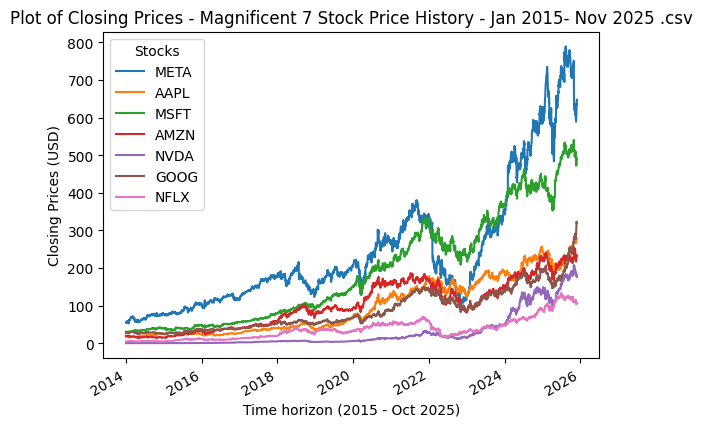

In [32]:
#Closing prices for 7 stocks - put as variable so can easily amend single line if future stocks added
#closing_Prices = df['Close'] - Can't use as multiindex dataframe
closing_Prices = df.xs('Close', level=1, axis=1)    
# References:
# Pandas MultiIndexing - https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing


#Creat new figure and axis
fig, ax = plt.subplots()
# References: 
# Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_Prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (2015 - Oct 2025)")
ax.set_ylabel("Closing Prices (USD)")
#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")



Comment  6
stock price ( as above)
Mean Stcok Price each day
Mean stock price each month
Rolling Stock Price

In [33]:
# Plot the stock prices - as above   
# ii) Plot the mean temperature each day - can't do as can only get last 60 days from yfinance free API
# iii) Plot the mean temperature for each month
# iv)#ii)The rolling windspeed (say over 24 hours)


# Will get the daily average stock price & plot this
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases







#Refernce to weather code from previous assignments
#df_daily_temp = df.resample("D").mean(numeric_only=True) # 'D' = daily frequency

# can't use 'date' as x index as used as index & no longer a column
#sns.lineplot(data=df_daily_temp, x=df_daily_temp.index, y="temp")

#plt.title("Daily Mean Temperature")
#plt.xlabel("Date")
#plt.ylabel("Temperature(°C)")
#plt.show()



In [37]:
# A)
# iii) Plot the mean closing stock price for each month

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

df_mean_monthly_price = df.resample("ME").mean(numeric_only=True) # 'ME' = month end frequency,groups data by month & labels by month end date

df_mean_monthly_price.columns

# can't use date as x index as used as index & no longer a column
#sns.lineplot(data=df_mean_monthly_price, x=df_mean_monthly_price.index, y="Close")

#plt.title("Monthly Mean Closing Stock price")
#plt.xlabel("Date")
#plt.ylabel("Price(USD)")
#plt.show()

MultiIndex([('META',   'Open'),
            ('META',   'High'),
            ('META',    'Low'),
            ('META',  'Close'),
            ('META', 'Volume'),
            ('AAPL',   'Open'),
            ('AAPL',   'High'),
            ('AAPL',    'Low'),
            ('AAPL',  'Close'),
            ('AAPL', 'Volume'),
            ('MSFT',   'Open'),
            ('MSFT',   'High'),
            ('MSFT',    'Low'),
            ('MSFT',  'Close'),
            ('MSFT', 'Volume'),
            ('AMZN',   'Open'),
            ('AMZN',   'High'),
            ('AMZN',    'Low'),
            ('AMZN',  'Close'),
            ('AMZN', 'Volume'),
            ('NVDA',   'Open'),
            ('NVDA',   'High'),
            ('NVDA',    'Low'),
            ('NVDA',  'Close'),
            ('NVDA', 'Volume'),
            ('GOOG',   'Open'),
            ('GOOG',   'High'),
            ('GOOG',    'Low'),
            ('GOOG',  'Close'),
            ('GOOG', 'Volume'),
            ('NFLX',   'Open'),
        